# Procesamiento de Imágenes
# Trabajo Práctico Nº1

## 1. Modos de color en imagenes

1. Utilizando openCV en python, cargar una imagen RGB y mostrarla en una ventana utilizando el
comando imread() y imshow(), tambien puede utilizar matplotlib para mostrarla.

In [73]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from PIL import Image

In [65]:
# Clase que maneja el abrir y mostrar imágenes
class ImageManager:
  def __init__(self):
    pass

  # Método para leer imágenes
  def read_image(self, path):
    return cv2.imread(path)
  
  # Método para mostrar imágenes con imshow()
  def show_image_cv2(self, image):
    cv2.imshow('image', image)
    cv2.waitKey(0)  # Esperar hasta que se presione una tecla
    cv2.destroyAllWindows()  # Cierra la ventana después
  
  # Método para mostrar imágenes con matplotlib
  def show_image_matplotlib(self,image):
    plt.figure()
    plt.imshow(image)
    plt.show()
  
  # Método para convertir una imágen a array
  def convert_image_to_array(self,image):
    return np.array(image)
  
  # Método para dividir una imágen
  def split_image(self,image):
    return cv2.split(image)

  def convert_bgr_to_rgb(sefl, image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Asignar clase
image_manager = ImageManager()

In [25]:

# Cargar imágen
butterfly_image = image_manager.read_image("../Images/mariposa.jpg")

#Mostrar imágen con imshow()
image_manager.show_image_cv2(butterfly_image)


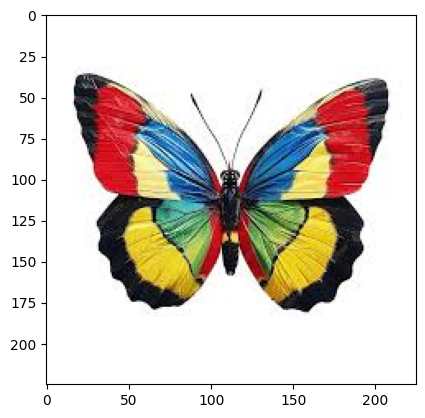

In [66]:
#Mostrar imágen con matplotlib
image_manager.show_image_matplotlib(image_manager.convert_bgr_to_rgb(butterfly_image))

2. Una vez cargada la imagen de muestra podemos empezar usando numpy y su función array para
obtener el arreglo de valores de intensidad para cada uno de los canales de color.

In [11]:
np_butterfly = image_manager.convert_image_to_array(butterfly_image)

print(np_butterfly.shape)

(225, 225, 3)


3. Retomando con el ejercicio 1, analizar la imagen cargada ¿Existe algún problema con los colores
mostrados con respecto a la imagen original?

ToDo

4. Cargar la imagen pero antes de mostrarla utilizar el comando cvtColor(). ¿Qué sucede ahora?

In [ ]:

butterfly_image_RGB = cv2.cvtColor(butterfly_image, cv2.COLOR_BGR2RGB)

image_manager.show_image_cv2(butterfly_image_RGB)

5. Utilizar la función split() para una imagen RGB y separar en canales.

In [38]:
b, g, r = image_manager.split_image(butterfly_image)

6. (*) La conversión de una imagen de color a escala de grises se puede hacer de varias formas. El ejercicio consiste en convertir la imagen de Lenna color a escala de grises utilizando diferentes métodos.

In [54]:

lenna_image = image_manager.read_image("../Images/Lenna.png")

# Clase que cambia los colores de una imágen
class ImageConversor:

    def __init__(self):
        pass
    
    #Recibe una imágen y una transformación de color dada por cv2.COLOR
    def cv2_color_conversor(self,image, transformation):
        return cv2.cvtColor(image, transformation)
    
    # Método que aplica la fórmula de lumiancia 
    def luminance_conversor(self, image): 
        b, g, r = image_manager.split_image(image) # Se separa la imágen en b,g,r
        # La formula de luminancia es:
        # 0.299 * r + 0.587 * g + 0.114 * b
        gray_image = 0.299 * r + 0.587 * g + 0.114 * b
        gray_image = gray_image.astype(np.uint8) # Convertir a enteros de 0 a 255
        return gray_image

    # Método que aplica rgb2gray
    def scickit_gray_conversor(self, image):
        image = image_manager.convert_bgr_to_rgb(image)
        return rgb2gray(image)

    
image_conversor = ImageConversor()


(a) Usando la libreria cv2 y el método cvtColor()

In [43]:
lenna_cvtColor = image_conversor.cv2_color_conversor(lenna_image,cv2.COLOR_BGR2GRAY)

image_manager.show_image_cv2(lenna_cvtColor)

(b) Usando la fórmula de luminancia

In [49]:
lenna_luminance = image_conversor.luminance_conversor(lenna_image)

image_manager.show_image_cv2(lenna_luminance)

(c) Usando scickit-image y el método rgb2gray()

In [55]:
lenna_scickit = image_conversor.scickit_gray_conversor(lenna_image)

image_manager.show_image_cv2(lenna_scickit)

ToDo
(d) ¿Qué pasa con los canales?
(e) ¿Qué profundidad de bits tiene la imagen?
(f) Evaluar con otra imagen de mayor profundidad
(g) ¿Qué sucede con la imagen? ¿Ha cambiado algo?

7. (*) Convertir la imagen de Lenna a otros modos de color, como CMYK, HSV, HSL. Mostrar el
resultado.

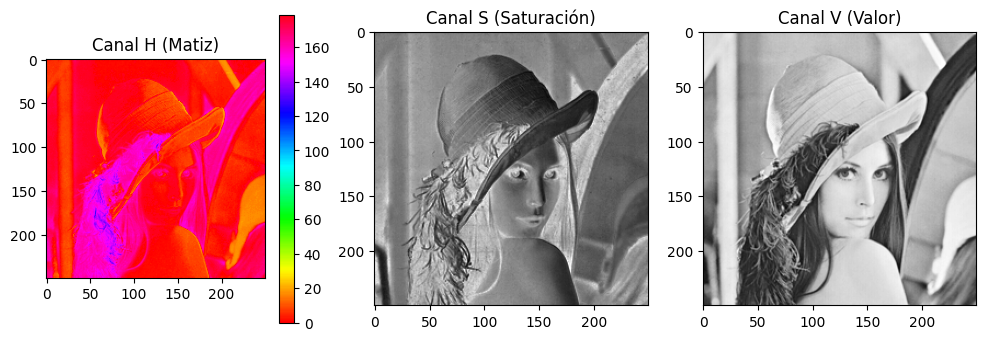

In [69]:
# A HSV
lenna_HSV = image_conversor.cv2_color_conversor(lenna_image,cv2.COLOR_BGR2HSV)

# Separar canales HSV
h, s, v = image_manager.split_image(lenna_HSV)

# Mostrar canales
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')  # Mapa de color para el matiz (Hue)
plt.title("Canal H (Matiz)")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')  # Saturación en escala de grises
plt.title("Canal S (Saturación)")

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')  # Valor (brillo) en escala de grises
plt.title("Canal V (Valor)")

plt.show()

#image_manager.show_image_cv2(lenna_HSV)
#image_manager.show_image_matplotlib(lenna_HSV)

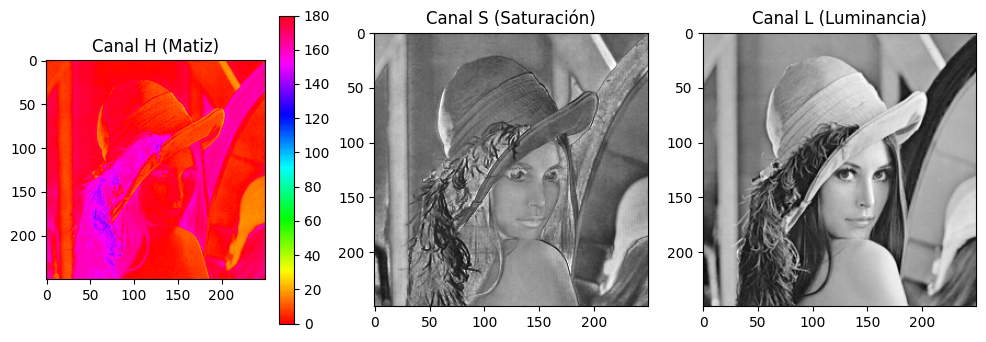

In [64]:
# A HSL
lenna_HLS = image_conversor.cv2_color_conversor(lenna_image,cv2.COLOR_BGR2HLS)

h, l, s = image_manager.split_image(lenna_HLS)

# Mostrar canales HLS
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')  # Matiz (Hue)
plt.title("Canal H (Matiz)")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')  # Saturación (Saturation)
plt.title("Canal S (Saturación)")

plt.subplot(1, 3, 3)
plt.imshow(l, cmap='gray')  # Luminancia (Lightness)
plt.title("Canal L (Luminancia)")

plt.show()

#image_manager.show_image_cv2(lenna_HLS)


In [82]:
# A CMYK

lenna_CMYK = Image.open("../Images/Lenna.png")
lenna_CMYK = lenna_CMYK.convert("CMYK")

# ToDo

8. (*) Tomar la imagen convertida en escala de grises y volver a convertir al en modo RGB. ¿Qué ha
sucedido?

9. Cargar una imagen en color con OpenCV. Extrae los valores de un píxel en la posición (x, y). Modifica un  ́area de la imagen (por ejemplo, convierte una región a rojo puro). Divide la imagen en sus tres canales de color (B, G, R) y muestra cada uno por separado.

## 2. Compresion de Imagenes

1. ¿El formato BMP es un formato de compresión?

2. (*) Dar detalles de las siguientes m ́etricas de calidad de compresión (PSNR, SSIM)

3. ¿Cúal es el impacto de la compresión en el procesamiento posterior de una imagen?

4. Cargar una imagen en color. Guarda la imagen con diferentes niveles de calidad (ejemplo: 90%, 50%,
10%). Comparar el tamaño, resolución, calidad, profundidad de bits de los archivos y la pérdida de
calidad. ¿Qué puede comentar de las im ́agenes resultantes?

5. Guardar una imagen en formato PNG con distintos niveles de compresión (0 a 9). Comparar el
tamaño de los archivos generados.

6. (*) Implementar un modelo de compresión basado en codificación Run-Length Encoding (RLE). El
algoritmo Run-Length Encoding (RLE) reduce el tamaño de una imagen representando secuencias
consecutivas de píxeles idénticos como una sola entrada. Para ello convertir una imagen en escala de
grises. luego, implementar el algoritmo RLE para comprimir la imagen. Posteriormente, implementar
una función para descomprimir la imagen. Al finalizar, mostrar la imagen original y la imagen
reconstruida. Probar con dos o tres imagenes que tengan diferentes características, modos de color.
utilizar alguna de las metricas nombradas anteriormente y evaluar el resultado de la misma.